<a href="https://colab.research.google.com/github/nishminavi/Predictive-maintenance/blob/main/XGboostnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing Dataset: FD001


/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:44:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)


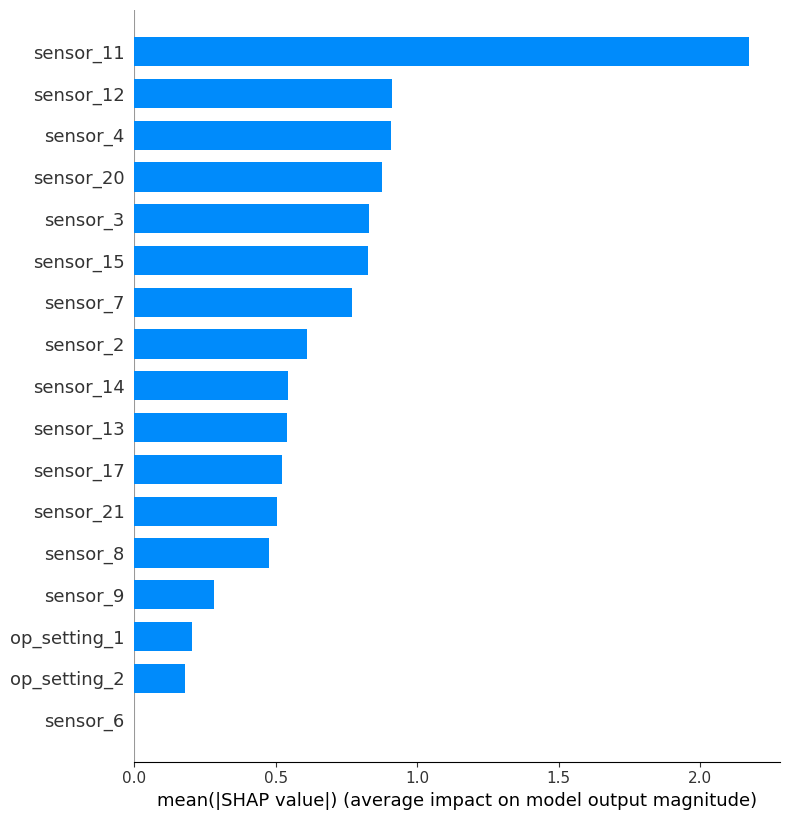

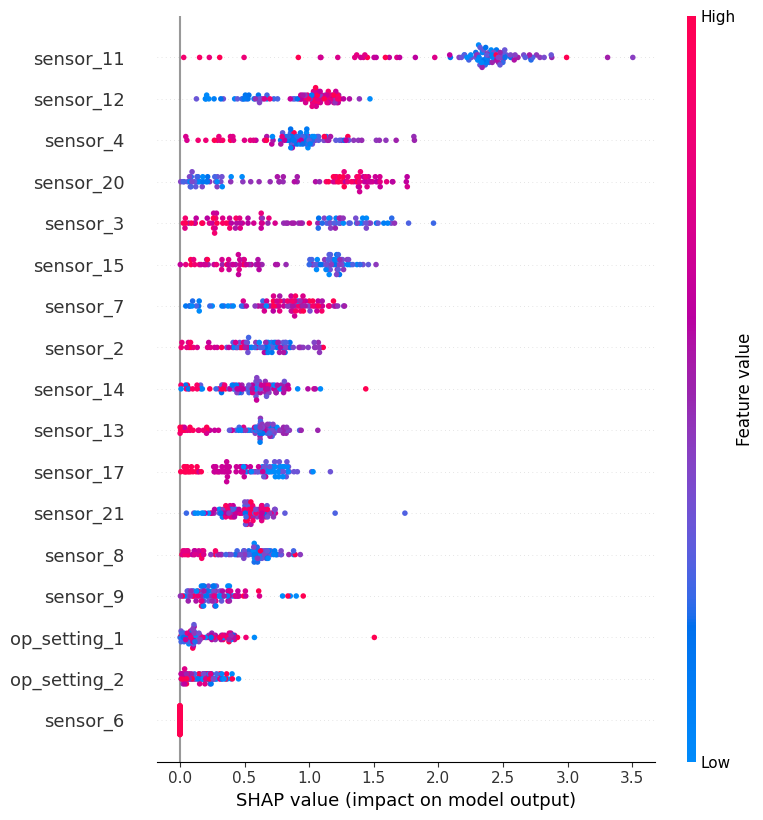

              precision    recall  f1-score   support

     Healthy       0.78      1.00      0.88      9996
     Failing       0.99      0.08      0.15      3100

    accuracy                           0.78     13096
   macro avg       0.88      0.54      0.51     13096
weighted avg       0.83      0.78      0.70     13096



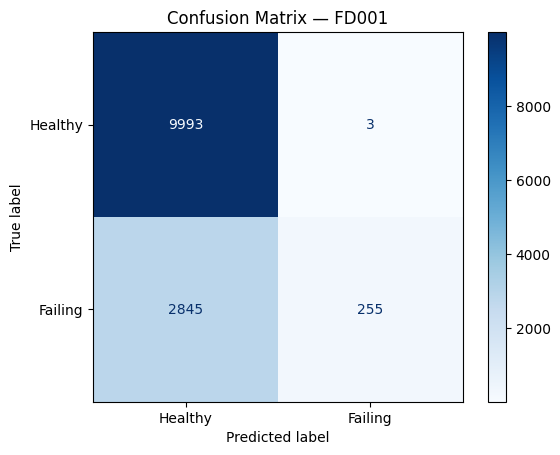

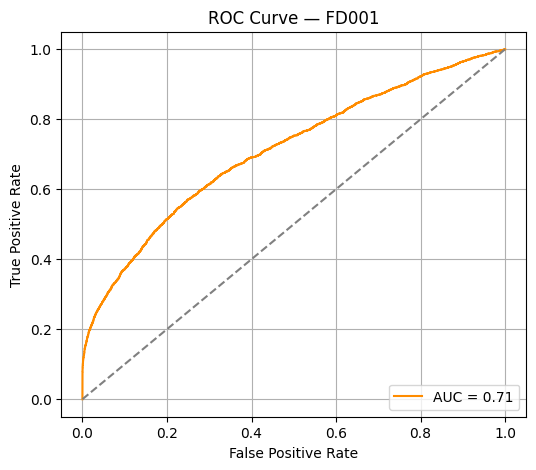


Processing Dataset: FD002


/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:44:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)


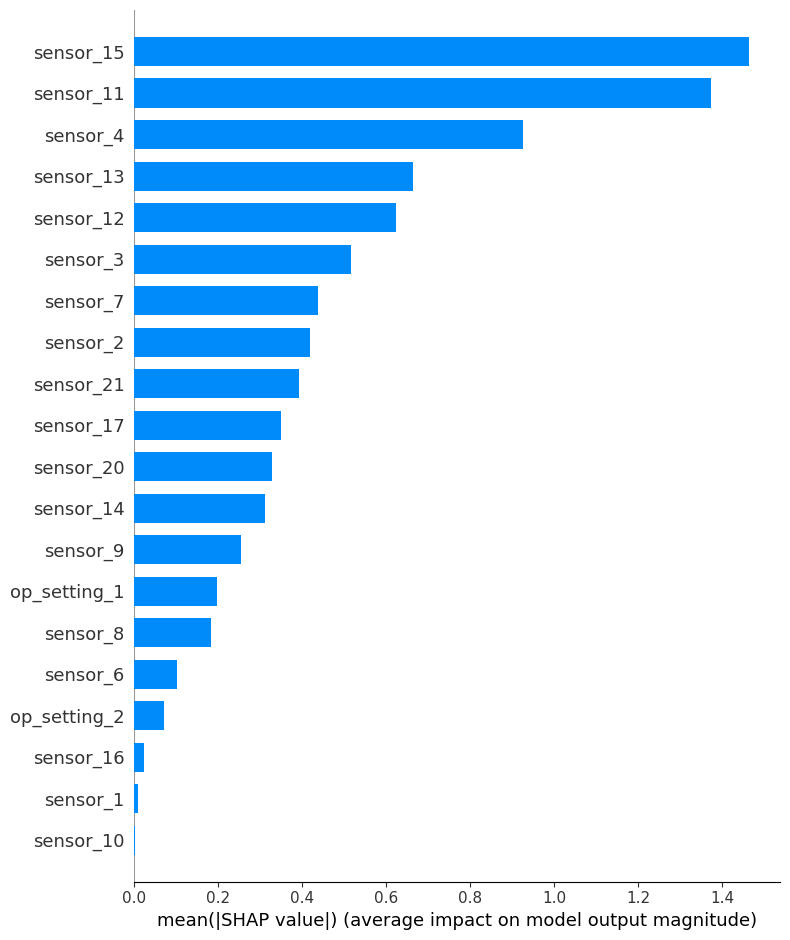

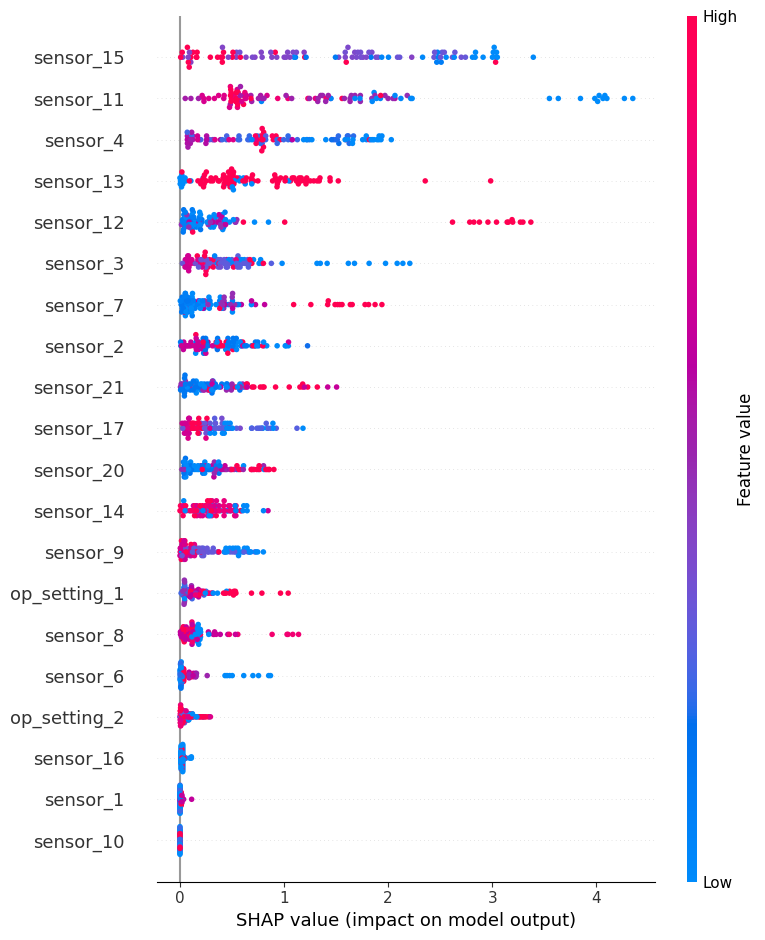

              precision    recall  f1-score   support

     Healthy       0.79      1.00      0.88     25999
     Failing       0.91      0.13      0.23      7992

    accuracy                           0.79     33991
   macro avg       0.85      0.56      0.56     33991
weighted avg       0.82      0.79      0.73     33991



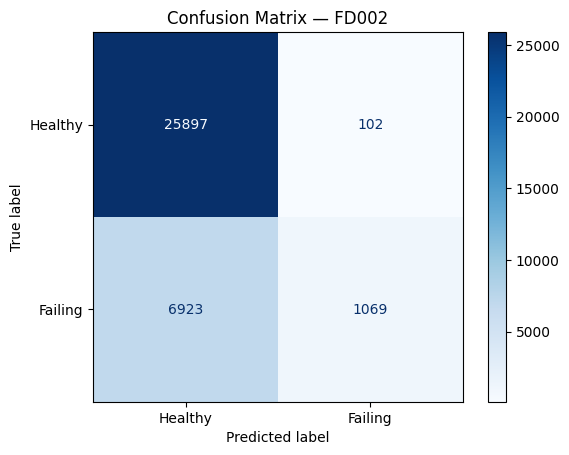

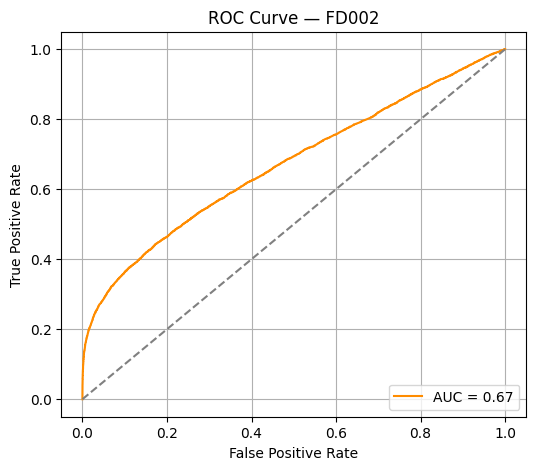


Processing Dataset: FD003


/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)


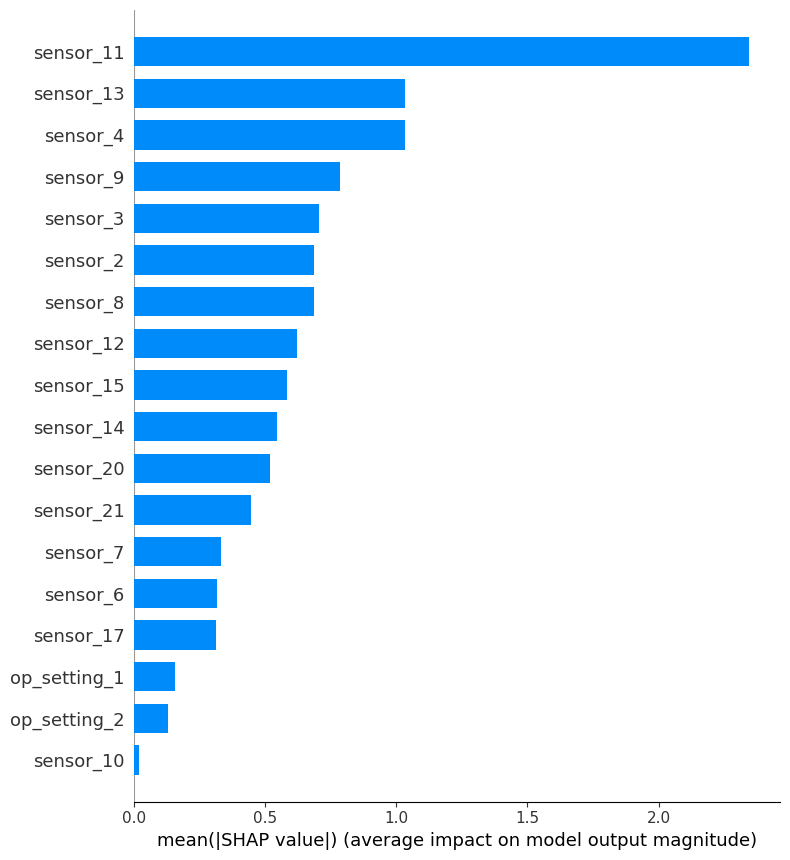

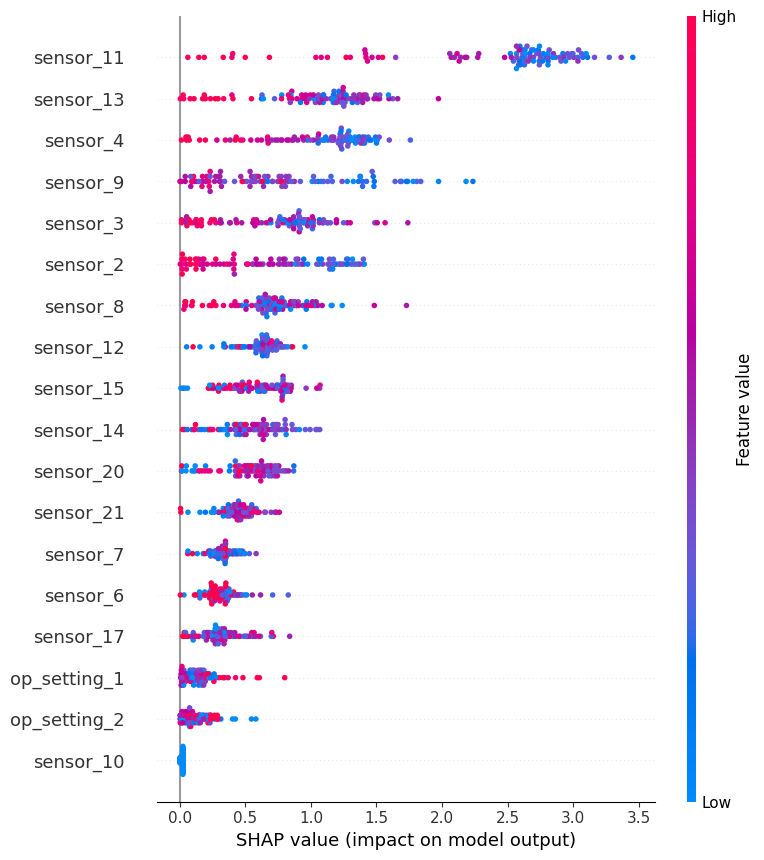

              precision    recall  f1-score   support

     Healthy       0.82      1.00      0.90     13496
     Failing       0.97      0.07      0.14      3100

    accuracy                           0.83     16596
   macro avg       0.90      0.54      0.52     16596
weighted avg       0.85      0.83      0.76     16596



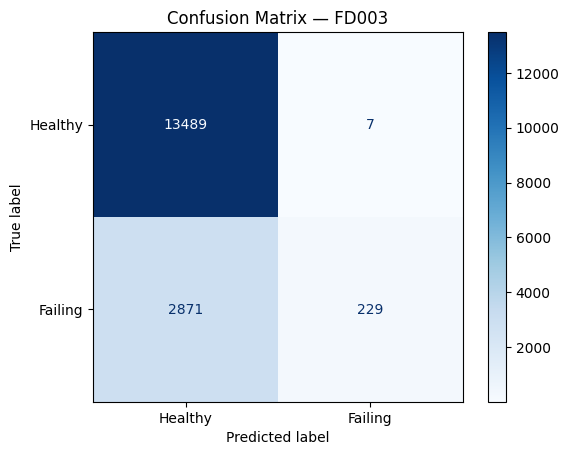

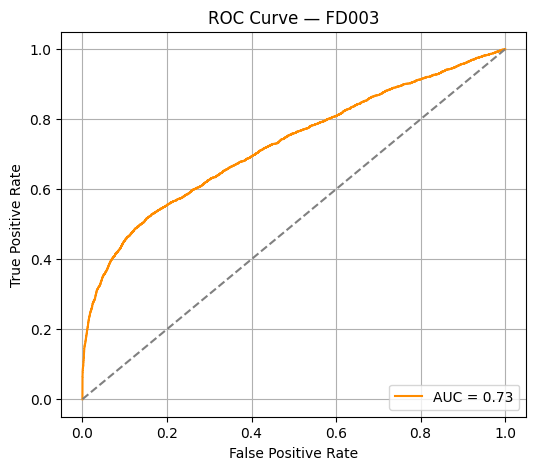


Processing Dataset: FD004


/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:44:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-3224492774.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)


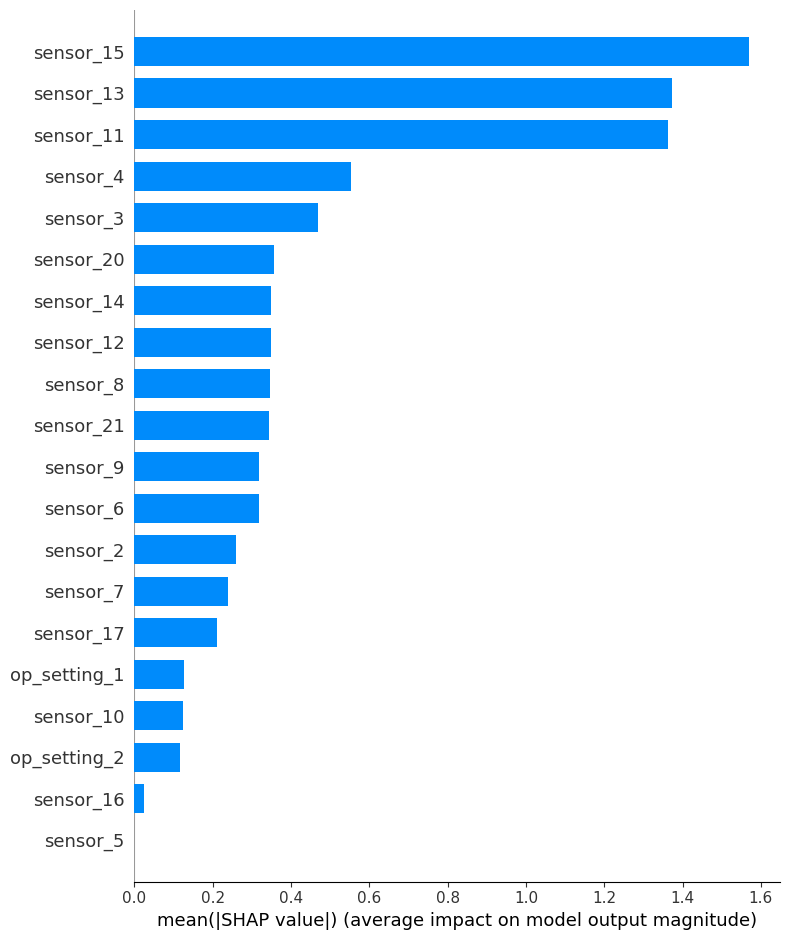

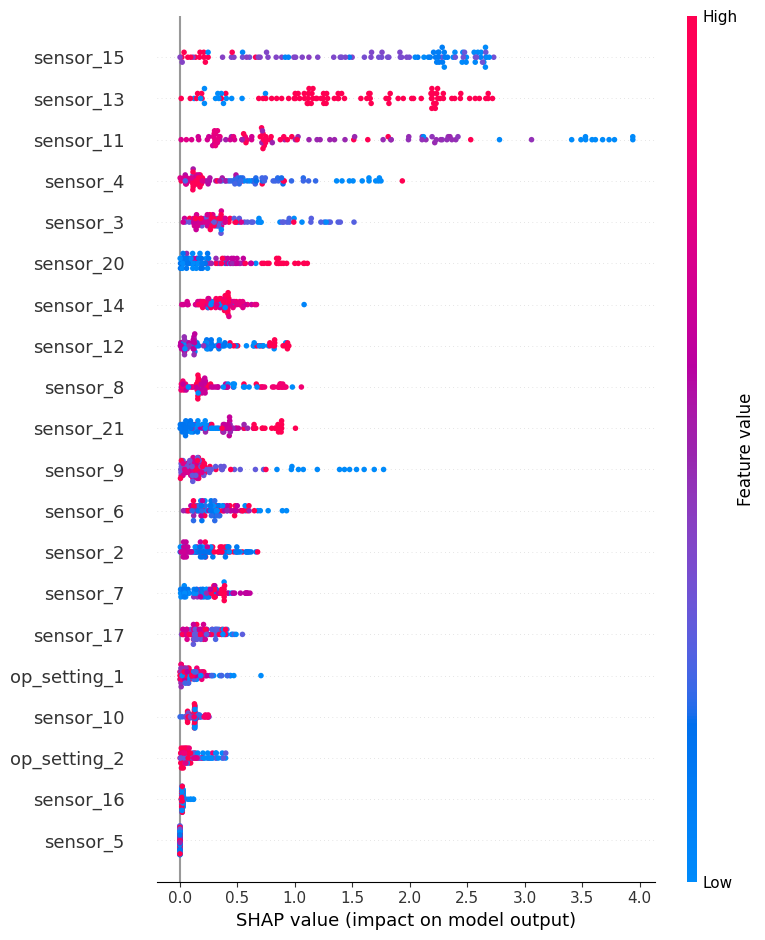

              precision    recall  f1-score   support

     Healthy       0.83      1.00      0.91     33607
     Failing       0.91      0.09      0.17      7607

    accuracy                           0.83     41214
   macro avg       0.87      0.54      0.54     41214
weighted avg       0.85      0.83      0.77     41214



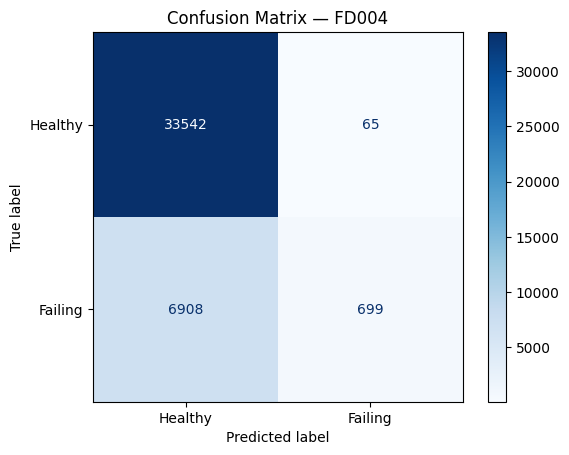

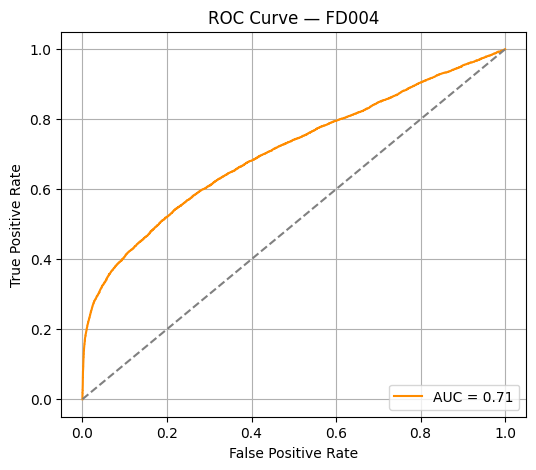


Global SHAP Comparison


<Figure size 1400x800 with 0 Axes>

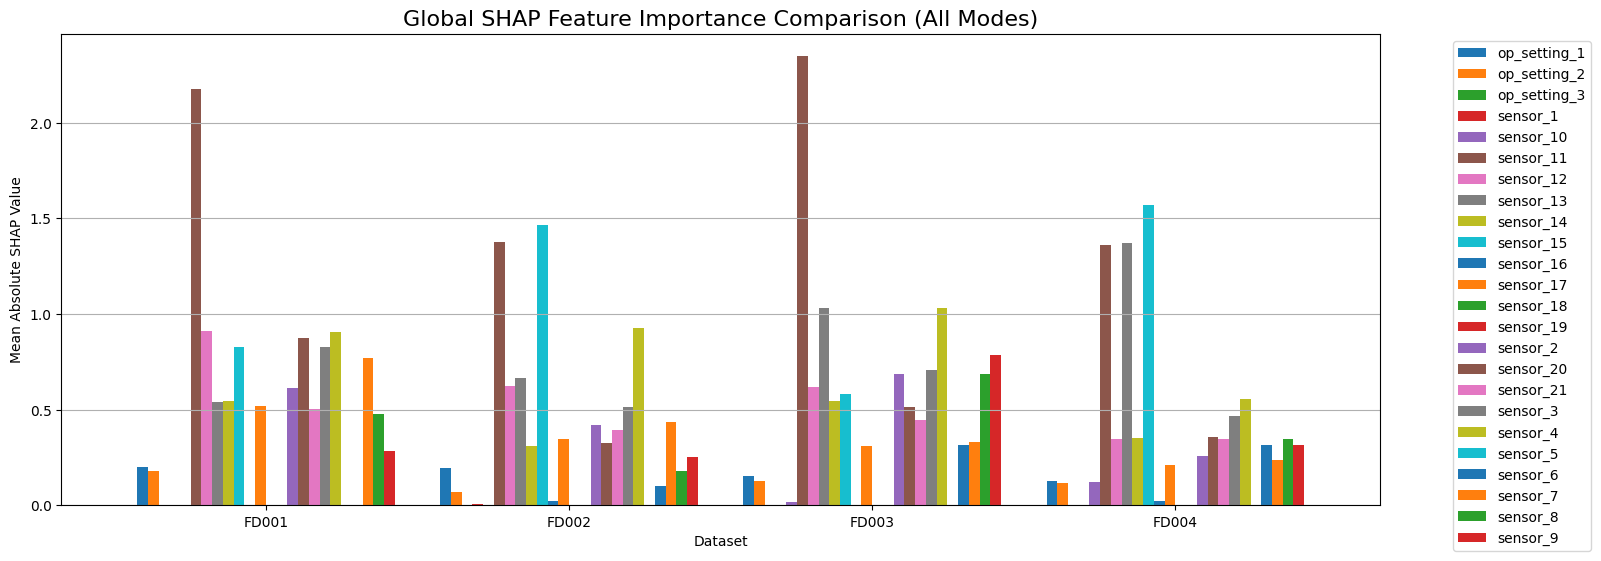


Combined ROC Curve Comparison


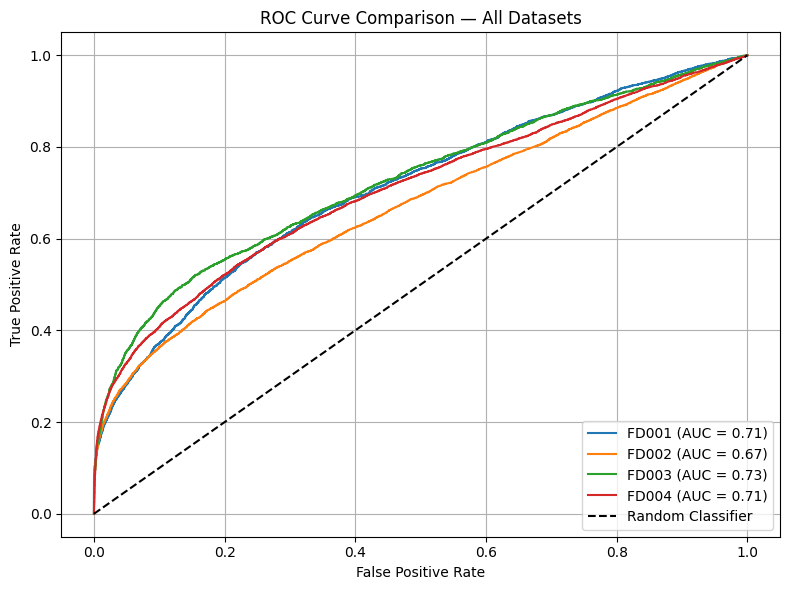


Combined Confusion Matrix Grid


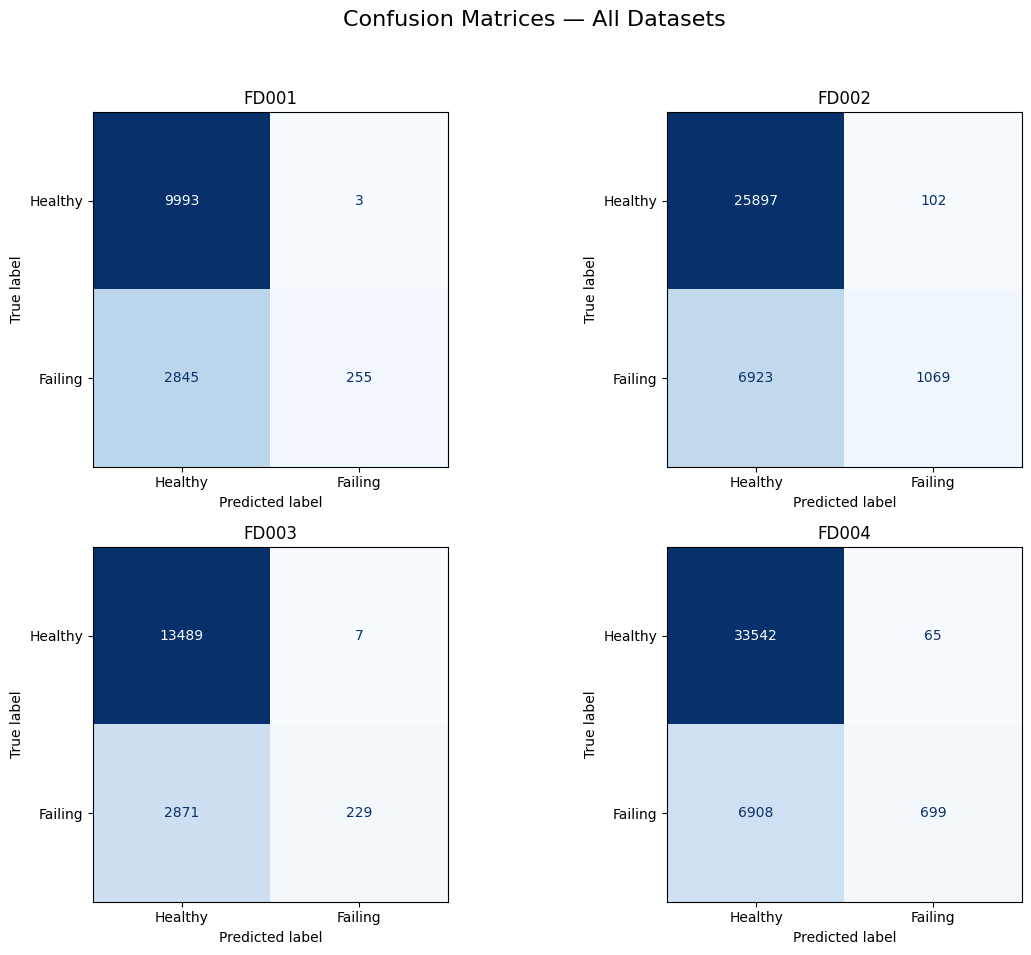

In [ ]:
# XGBoost version of the full pipeline with SHAP, ROC, and Confusion Matrix Evaluation

import os
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import shap

from google.colab import drive

# Mount Google Drive (Colab only)
drive.mount('/content/drive')

# Paths
train_base_path = '/content/drive/MyDrive/Aerospace/train data'
test_base_path = '/content/drive/MyDrive/Aerospace/test data'
datasets = ['FD001', 'FD002', 'FD003', 'FD004']
column_names = ['unit', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
RUL_THRESHOLD = 30

# Functions
def load_and_clean_data(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
    df = df.drop_duplicates().sort_values(by=['unit', 'cycle']).reset_index(drop=True)
    low_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
    df.drop(columns=low_var_cols, inplace=True)
    return df

def calculate_rul(df):
    max_cycle = df.groupby('unit')['cycle'].max().reset_index()
    max_cycle.columns = ['unit', 'max_cycle']
    df = df.merge(max_cycle, on='unit', how='left')
    df['RUL'] = df['max_cycle'] - df['cycle']
    df.drop('max_cycle', axis=1, inplace=True)
    return df

def create_binary_labels(df, threshold=30):
    df['label'] = df['RUL'].apply(lambda x: 1 if x <= threshold else 0)
    return df

def plot_conf_matrix(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Failing"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix — {dataset_name}")
    plt.show()

def plot_roc_curve(y_true, y_probs, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve — {dataset_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Global results and SHAP dicts
results = {}
global_shap_dict = {}

# Main loop
for name in datasets:
    print(f"\nProcessing Dataset: {name}")

    df_train = load_and_clean_data(os.path.join(train_base_path, f'train_{name}.txt'))
    df_train = calculate_rul(df_train)
    df_train = create_binary_labels(df_train, threshold=RUL_THRESHOLD)
    feature_cols = df_train.columns.difference(['unit', 'cycle', 'RUL', 'label'])

    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    X_train = df_train[feature_cols]
    y_train = df_train['label']

    model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    df_test = load_and_clean_data(os.path.join(test_base_path, f'test_{name}.txt'))
    df_test = calculate_rul(df_test)
    df_test = create_binary_labels(df_test, threshold=RUL_THRESHOLD)
    df_test[feature_cols] = scaler.transform(df_test[feature_cols])
    X_test = df_test[feature_cols]
    y_test = df_test['label']

    # SHAP values
    X_sample = X_test.sample(n=min(100, len(X_test)), random_state=42)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)

    try:
        shap_vals = np.abs(shap_values)
        if shap_vals.ndim == 3:
            shap_vals = shap_vals.mean(axis=2)

        global_shap_dict[name] = pd.Series(shap_vals.mean(axis=0), index=X_sample.columns)
        shap.summary_plot(shap_vals, X_sample, plot_type="bar", show=True)
        shap.summary_plot(shap_vals, X_sample, show=True)

    except Exception as e:
        print(f"SHAP plotting failed for {name}: {e}")

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred, target_names=["Healthy", "Failing"]))
    plot_conf_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_prob, name)

    results[name] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

# SHAP Comparison
print("\nGlobal SHAP Comparison")
global_shap_df = pd.DataFrame(global_shap_dict).fillna(0)

plt.figure(figsize=(14, 8))
global_shap_df.T.plot(kind='bar', figsize=(14, 6), width=0.85)
plt.title("Global SHAP Feature Importance Comparison (All Modes)", fontsize=16)
plt.ylabel("Mean Absolute SHAP Value")
plt.xlabel("Dataset")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Combined ROC Curve Comparison
print("\nCombined ROC Curve Comparison")

plt.figure(figsize=(8, 6))
for name in datasets:
    y_test = results[name]['y_test']
    y_prob = results[name]['y_prob']
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title("ROC Curve Comparison — All Datasets")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Combined Confusion Matrix Grid
print("\nCombined Confusion Matrix Grid")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, name in enumerate(datasets):
    y_test = results[name]['y_test']
    y_pred = results[name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy", "Failing"])
    disp.plot(ax=axs[i], cmap='Blues', colorbar=False)
    axs[i].set_title(f"{name}")

plt.suptitle("Confusion Matrices — All Datasets", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Processing dataset: FD001


/tmp/ipython-input-1538545251.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 10 SHAP-selected features: ['op_setting_2', 'sensor_13', 'sensor_9', 'sensor_15', 'sensor_8', 'sensor_7', 'sensor_12', 'sensor_14', 'sensor_4', 'sensor_11']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9756, F1: 0.9757, AUC: 0.9974


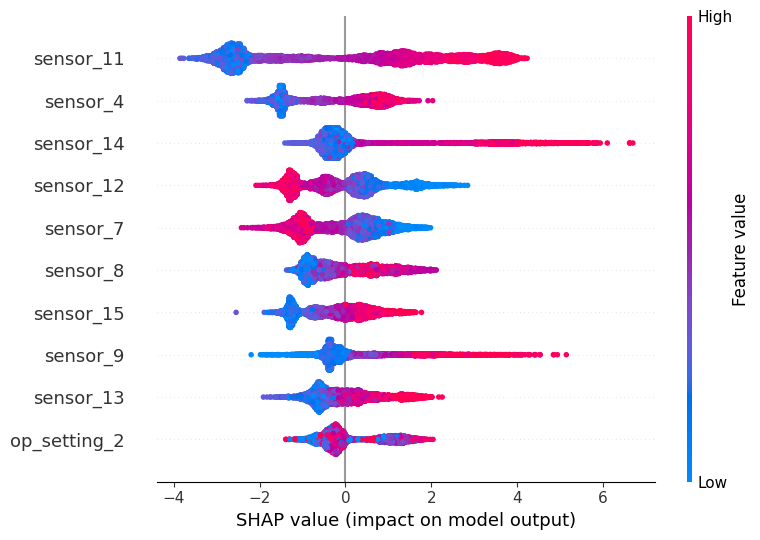

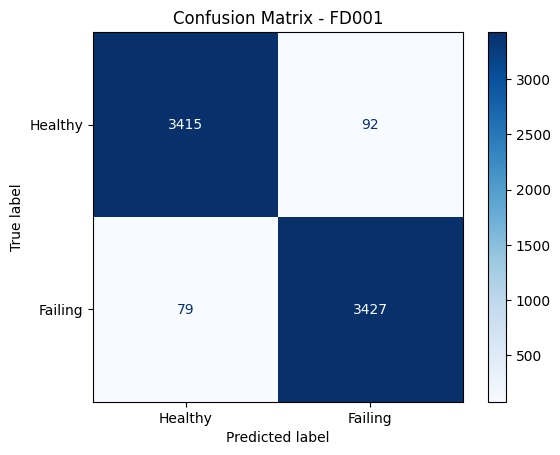

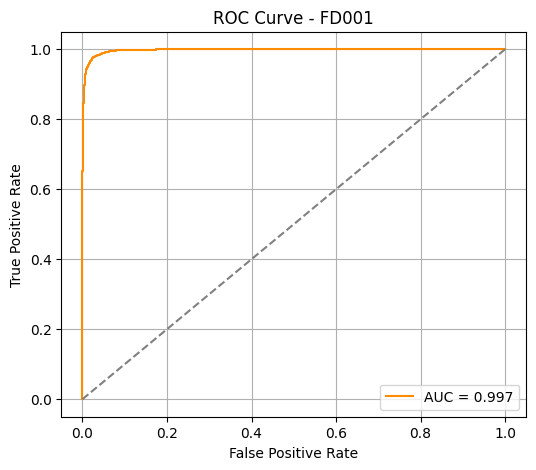


Processing dataset: FD002


/tmp/ipython-input-1538545251.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 10 SHAP-selected features: ['sensor_7', 'sensor_20', 'sensor_21', 'sensor_2', 'sensor_14', 'sensor_12', 'sensor_4', 'sensor_13', 'sensor_11', 'sensor_15']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9573, F1: 0.9577, AUC: 0.9920


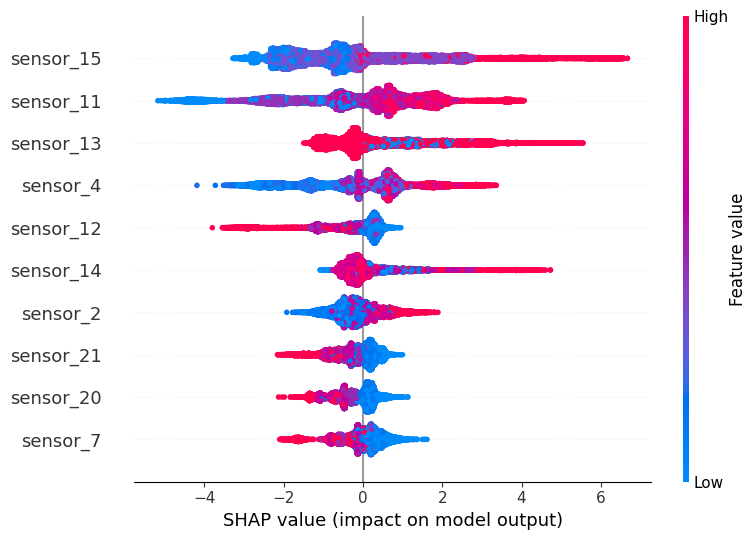

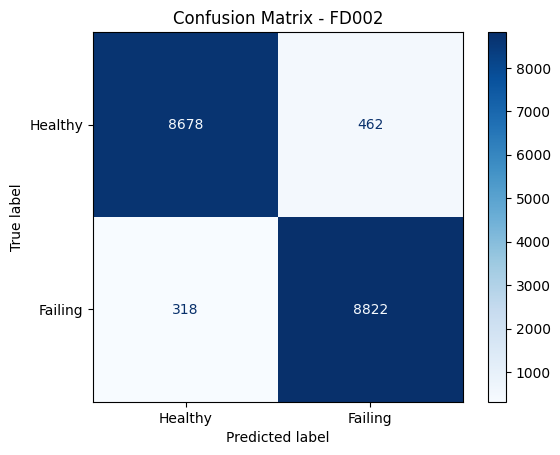

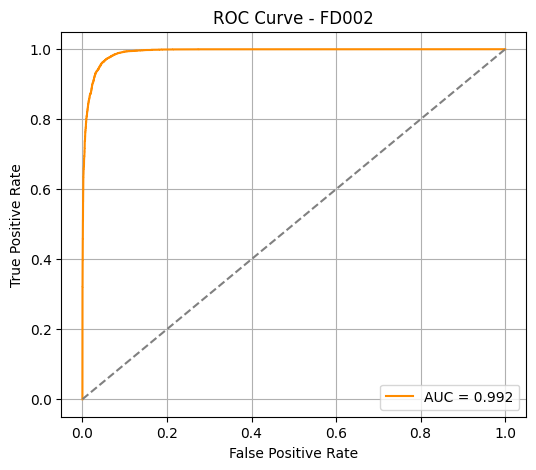


Processing dataset: FD003


/tmp/ipython-input-1538545251.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 10 SHAP-selected features: ['sensor_2', 'sensor_12', 'op_setting_2', 'sensor_8', 'sensor_4', 'sensor_14', 'sensor_13', 'sensor_9', 'sensor_17', 'sensor_11']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9786, F1: 0.9788, AUC: 0.9979


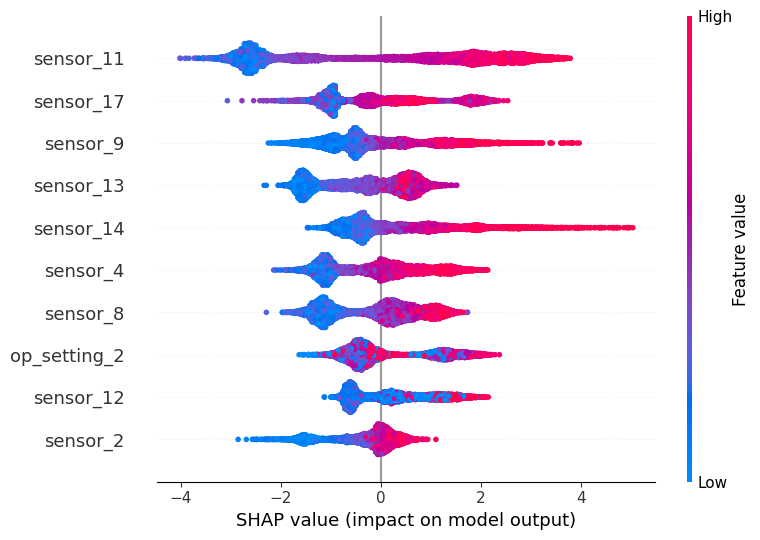

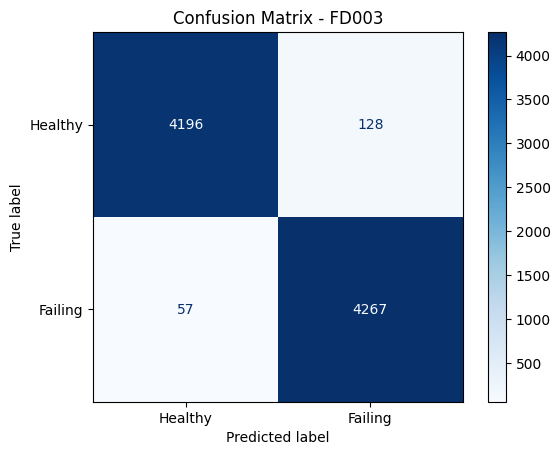

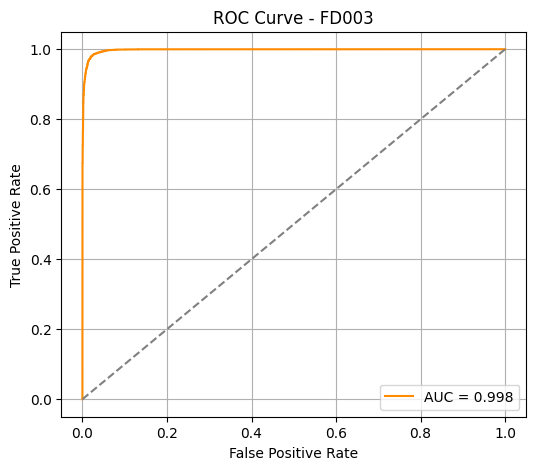


Processing dataset: FD004


/tmp/ipython-input-1538545251.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 10 SHAP-selected features: ['sensor_17', 'sensor_3', 'sensor_12', 'sensor_14', 'op_setting_2', 'sensor_6', 'sensor_4', 'sensor_11', 'sensor_15', 'sensor_13']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:37:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9690, F1: 0.9693, AUC: 0.9954


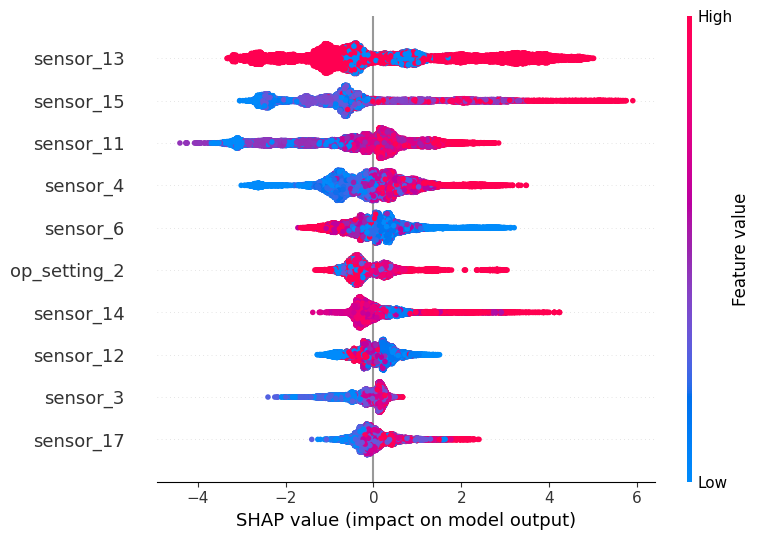

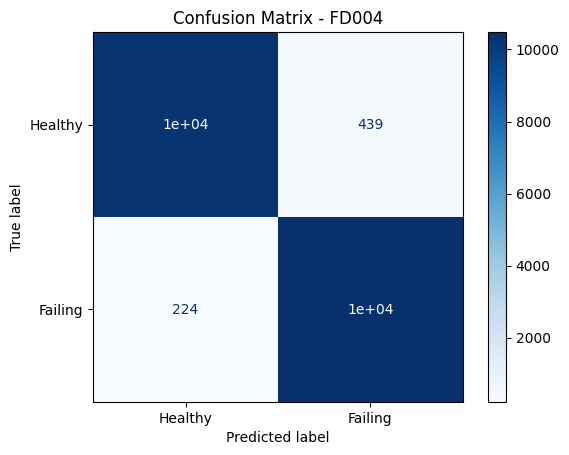

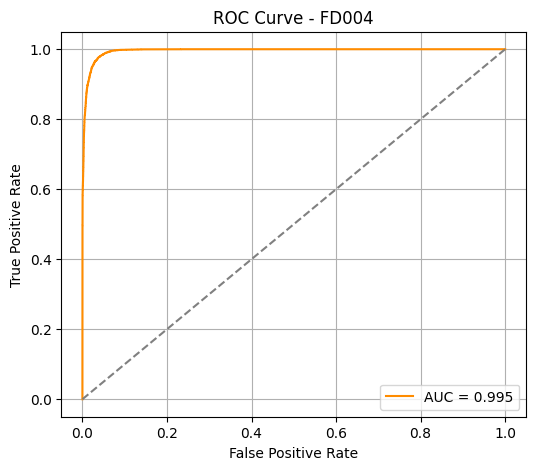

<Figure size 1400x800 with 0 Axes>

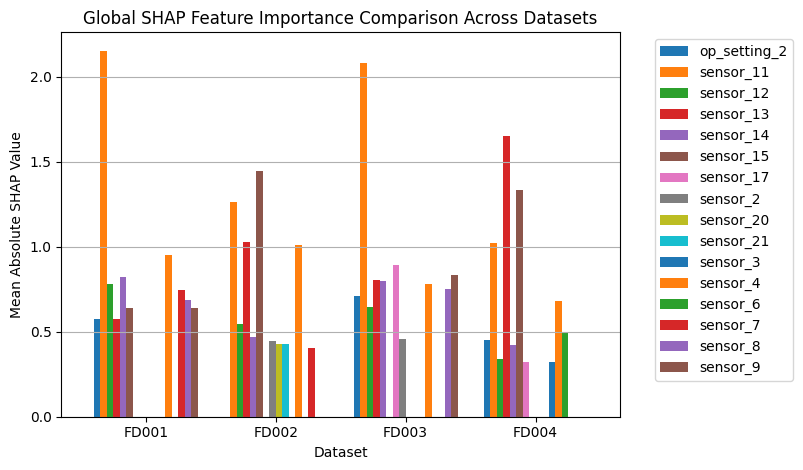

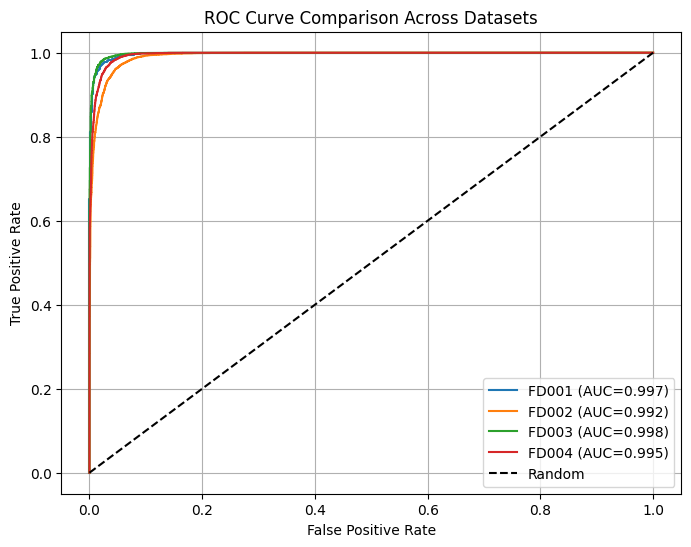

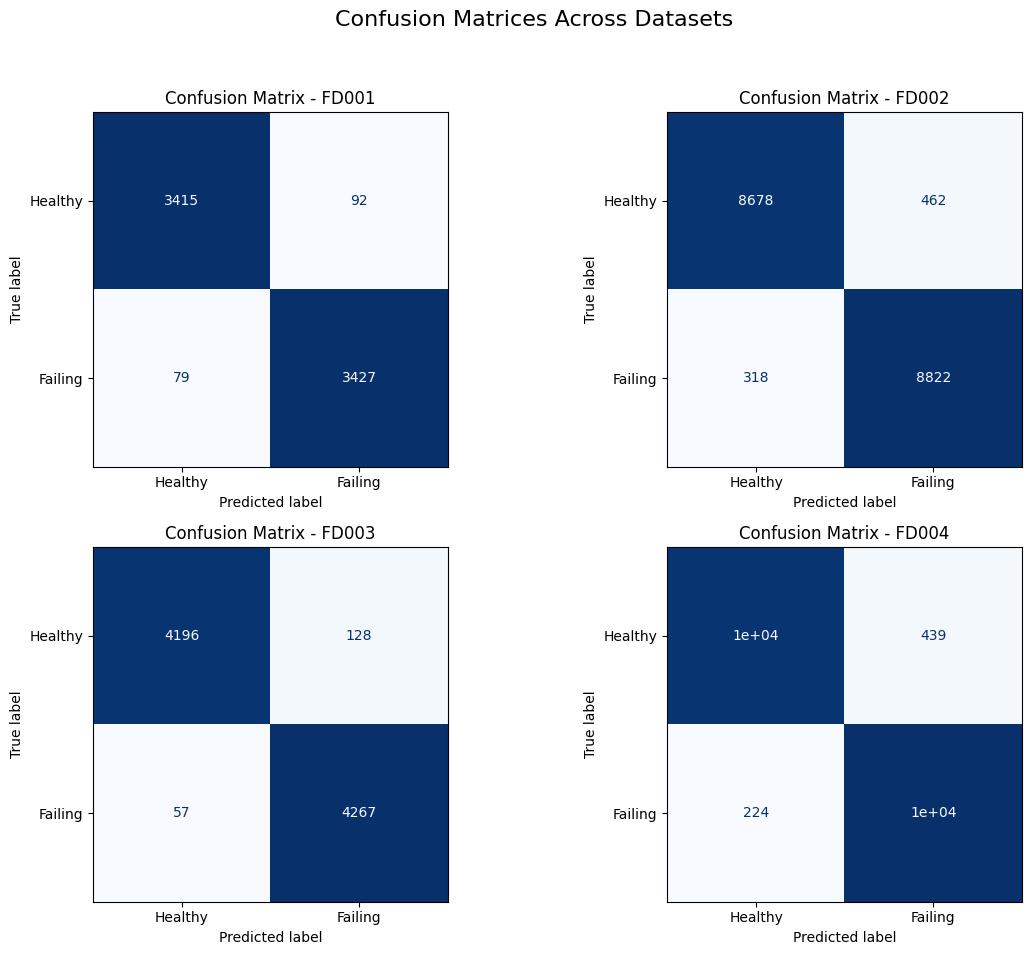


Summary of results:
FD001: Accuracy=0.9756, F1=0.9757, AUC=0.9974
FD002: Accuracy=0.9573, F1=0.9577, AUC=0.9920
FD003: Accuracy=0.9786, F1=0.9788, AUC=0.9979
FD004: Accuracy=0.9690, F1=0.9693, AUC=0.9954


In [ ]:
#Enhanced XGBoost

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import shap

# Define paths and constants
train_base_path = '/content/drive/MyDrive/Aerospace/train data'  # update if needed
test_base_path = '/content/drive/MyDrive/Aerospace/test data'    # update if needed
datasets = ['FD001', 'FD002', 'FD003', 'FD004']
column_names = ['unit', 'cycle'] + [f'op_setting_{i}' for i in range(1,4)] + [f'sensor_{i}' for i in range(1,22)]
RUL_THRESHOLD = 30
TOP_FEATURES_COUNT = 10  # Number of top features to select by SHAP

# Helper functions

def load_and_clean_data(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)
    df = df.drop_duplicates().sort_values(['unit', 'cycle']).reset_index(drop=True)
    low_var_cols = [c for c in df.columns if df[c].nunique() <= 1]
    df.drop(columns=low_var_cols, inplace=True)
    return df

def calculate_rul(df):
    max_cycle = df.groupby('unit')['cycle'].max().reset_index()
    max_cycle.columns = ['unit', 'max_cycle']
    df = df.merge(max_cycle, on='unit', how='left')
    df['RUL'] = df['max_cycle'] - df['cycle']
    df.drop(columns=['max_cycle'], inplace=True)
    return df

def create_binary_labels(df, threshold=RUL_THRESHOLD):
    df['label'] = (df['RUL'] <= threshold).astype(int)
    return df

def plot_conf_matrix(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Failing'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

def plot_roc_curve(y_true, y_prob, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Main pipeline for all datasets
results = {}
global_shap_values = {}

for name in datasets:
    print(f"\nProcessing dataset: {name}")

    # Load and clean training data
    train_path = os.path.join(train_base_path, f'train_{name}.txt')
    df_train = load_and_clean_data(train_path)
    df_train = calculate_rul(df_train)
    df_train = create_binary_labels(df_train)

    # Features and labels
    feature_cols = df_train.columns.difference(['unit', 'cycle', 'RUL', 'label'])
    X = df_train[feature_cols]
    y = df_train['label']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Balance classes with SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_scaled, y)

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

    # Train initial XGBoost to get SHAP values
    model_init = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_init.fit(X_train, y_train)

    # Compute SHAP values on validation set
    explainer = shap.TreeExplainer(model_init)
    shap_values = explainer.shap_values(X_val)
    mean_shap = np.abs(shap_values).mean(axis=0)

    # Select top features by mean SHAP value
    top_idx = np.argsort(mean_shap)[-TOP_FEATURES_COUNT:]
    selected_features = [feature_cols[i] for i in top_idx]

    print(f"Top {TOP_FEATURES_COUNT} SHAP-selected features: {selected_features}")

    # Train final model on selected features
    # Prepare data with selected features
    X_train_sel = pd.DataFrame(X_train, columns=feature_cols)[selected_features]
    X_val_sel = pd.DataFrame(X_val, columns=feature_cols)[selected_features]

    model_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_final.fit(X_train_sel, y_train)

    # Predict on validation
    y_pred = model_final.predict(X_val_sel)
    y_prob = model_final.predict_proba(X_val_sel)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc_score = roc_auc_score(y_val, y_prob)

    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, AUC: {auc_score:.4f}")

    # Save results
    results[name] = {
        'model': model_final,
        'accuracy': acc,
        'f1': f1,
        'auc': auc_score,
        'y_val': y_val,
        'y_pred': y_pred,
        'y_prob': y_prob,
        'selected_features': selected_features,
        'explainer': explainer,
        'X_val_sel': X_val_sel
    }

    # Plot SHAP summary for this dataset
    shap.summary_plot(shap_values[:, top_idx], X_val_sel, feature_names=selected_features, show=True)

    # Plot confusion matrix & ROC curve
    plot_conf_matrix(y_val, y_pred, name)
    plot_roc_curve(y_val, y_prob, name)

    # Store mean SHAP values for global comparison
    global_shap_values[name] = pd.Series(mean_shap[top_idx], index=selected_features)

# Global SHAP feature importance comparison plot
shap_df = pd.DataFrame(global_shap_values).fillna(0)
plt.figure(figsize=(14,8))
shap_df.T.plot(kind='bar', width=0.8)
plt.title('Global SHAP Feature Importance Comparison Across Datasets')
plt.ylabel('Mean Absolute SHAP Value')
plt.xlabel('Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Combined ROC curve comparison
plt.figure(figsize=(8,6))
for name in datasets:
    y_true = results[name]['y_val']
    y_prob = results[name]['y_prob']
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc_val:.3f})')
plt.plot([0,1],[0,1], 'k--', label='Random')
plt.title('ROC Curve Comparison Across Datasets')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Combined confusion matrices grid
fig, axs = plt.subplots(2,2, figsize=(12,10))
axs = axs.flatten()
for i, name in enumerate(datasets):
    cm = confusion_matrix(results[name]['y_val'], results[name]['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Failing'])
    disp.plot(ax=axs[i], cmap='Blues', colorbar=False)
    axs[i].set_title(f'Confusion Matrix - {name}')
plt.suptitle('Confusion Matrices Across Datasets', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

# Final performance summary
print("\nSummary of results:")
for name in datasets:
    print(f"{name}: Accuracy={results[name]['accuracy']:.4f}, F1={results[name]['f1']:.4f}, AUC={results[name]['auc']:.4f}")
